
#Regression Analysis on Course Data

---

## Table of Contents
1. [Introduction](#1-introduction)
2. [Problem Statement](#2-problem-statement)
3. [Data Description](#3-data-description)
4. [Exploratory Data Analysis (EDA)](#4-exploratory-data-analysis-eda)
   
   4.1 [Loading and Inspecting Data](#41-loading-and-inspecting-data)
   
   4.2 [Univariate Analysis](#42-univariate-analysis)
   
   4.3 [Bivariate Analysis](#43-bivariate-analysis)
   
   4.4 [Correlation Analysis](#44-correlation-analysis)
5. [Data Preprocessing](#5-data-preprocessing)
   
   5.1 [Handling Missing Values](#51-handling-missing-values)
   
   5.2 [Encoding Categorical Variables](#52-encoding-categorical-variables)
   
   5.3 [Feature Scaling](#53-feature-scaling)
6. [Regression Analysis](#6-regression-analysis)
   
   6.1 [Linear Regression](#61-linear-regression)
   
   6.2 [Decision Tree Regression](#62-decision-tree-regression)
   
   6.3 [Random Forest Regression](#63-random-forest-regression)
7. [Model Evaluation](#7-model-evaluation)
8. [Conclusion](#8-conclusion)
9. [Future Work](#9-future-work)
10. [References](#10-references)

---

## 1. Introduction
This project aims to perform regression analysis on course data to predict target variables. Various regression models will be applied and compared to find the best-performing model.

## 2. Problem Statement
The objective is to analyze course data and build regression models to predict outcomes accurately. This analysis will help in understanding the key factors influencing the target variables.

## 3. Data Description
The dataset contains information about courses, including numerical and categorical features. The target variable is a continuous outcome that we aim to predict using regression models.

## 4. Exploratory Data Analysis (EDA)
### 4.1 Loading and Inspecting Data

In [48]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

# Preprocessing
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv('/content/coursea_data.csv')

In [76]:
# Display basic information about the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 1049 entries, Unnamed: 0 to course_difficulty_Mixed
dtypes: bool(1045), float64(4)
memory usage: 937.2 KB
None
         Unnamed: 0  course_rating  course_students_enrolled  \
count  8.910000e+02   8.910000e+02              8.910000e+02   
mean   1.993666e-18  -2.053476e-15              3.987333e-18   
std    1.000562e+00   1.000562e+00              1.000562e+00   
min   -1.730108e+00  -8.495014e+00             -4.897429e-01   
25%   -8.650540e-01  -4.769447e-01             -4.017507e-01   
50%    0.000000e+00   1.398299e-01             -2.670127e-01   
75%    8.650540e-01   7.566045e-01              4.920921e-02   
max    1.730108e+00   1.990154e+00              1.710044e+01   

       numerical_difficulty  
count          8.910000e+02  
mean           2.392400e-17  
std            1.000562e+00  
min           -8.123023e-01  
25%           -8.123023e-01  
50%           -8.123023e-01  
75%            3.3835

###Inferences:

1. **Course Ratings**: Ratings range from 3.3 to 5.0, with an average of 4.68, indicating predominantly high ratings.

2. **Enrollment**: Enrollment varies widely, from 1,500 to 3.2 million students per course.

3. **Difficulty Levels**: Courses span different difficulty levels, with a mean difficulty of approximately 0.71, suggesting mostly easier to intermediate courses.

4. **Dataset Overview**: The dataset contains 891 entries with no missing values, focusing on course attributes like title, organization, certificate type, rating, difficulty, and enrollment.

5. **Statistical Insights**: Small standard deviations relative to means imply concentrated data around average ratings and enrollments, with some variability.

##4.2 Exploratory Data Analysis (EDA)
###4.2.1 Univariate Analysis

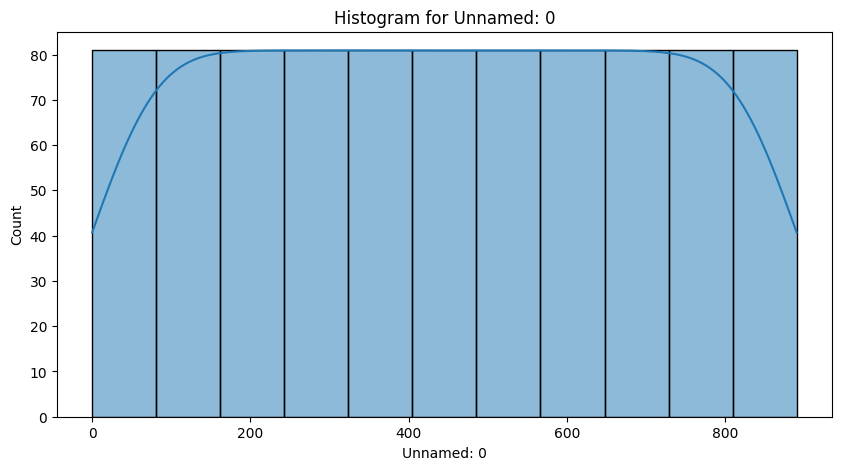

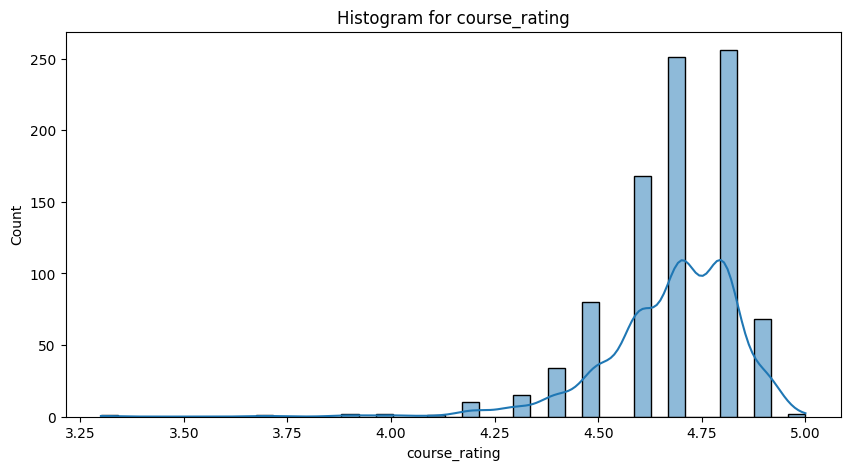

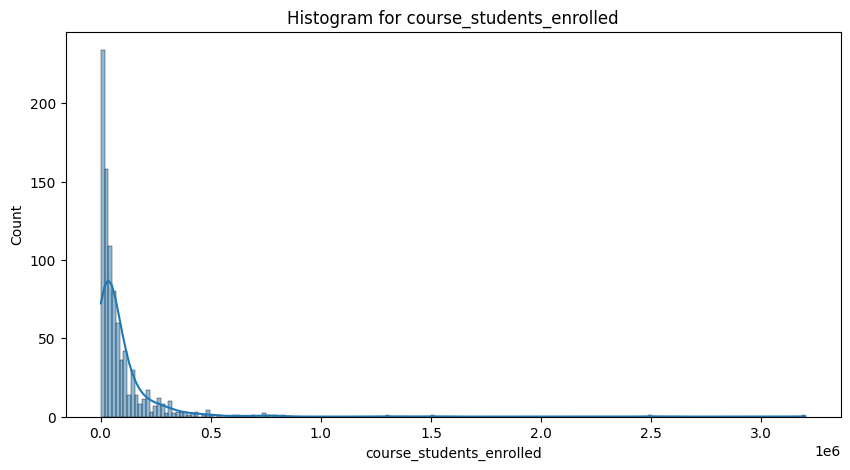

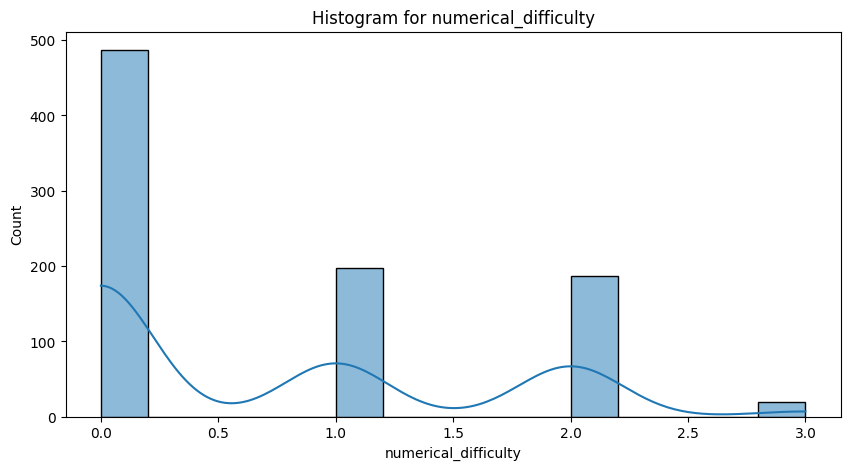

In [50]:
# Plot histograms for numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()


###**Inferences:**

1. **Course Rating**:
   - The histogram shows a distribution skewed towards higher ratings (around 4.6 to 4.8), indicating that most courses are highly rated.

2. **Course Students Enrolled**:
   - The enrollment histogram reveals a right-skewed distribution, suggesting that a majority of courses have lower enrollment numbers, with a few courses having significantly higher enrollments.

3. **Numerical Difficulty**:
   - The histogram for numerical difficulty indicates that the dataset mostly includes courses classified as easier (0 difficulty level), with fewer courses categorized as moderate to difficult (levels 1 to 3).


###4.2.2 Bivariate Analysis


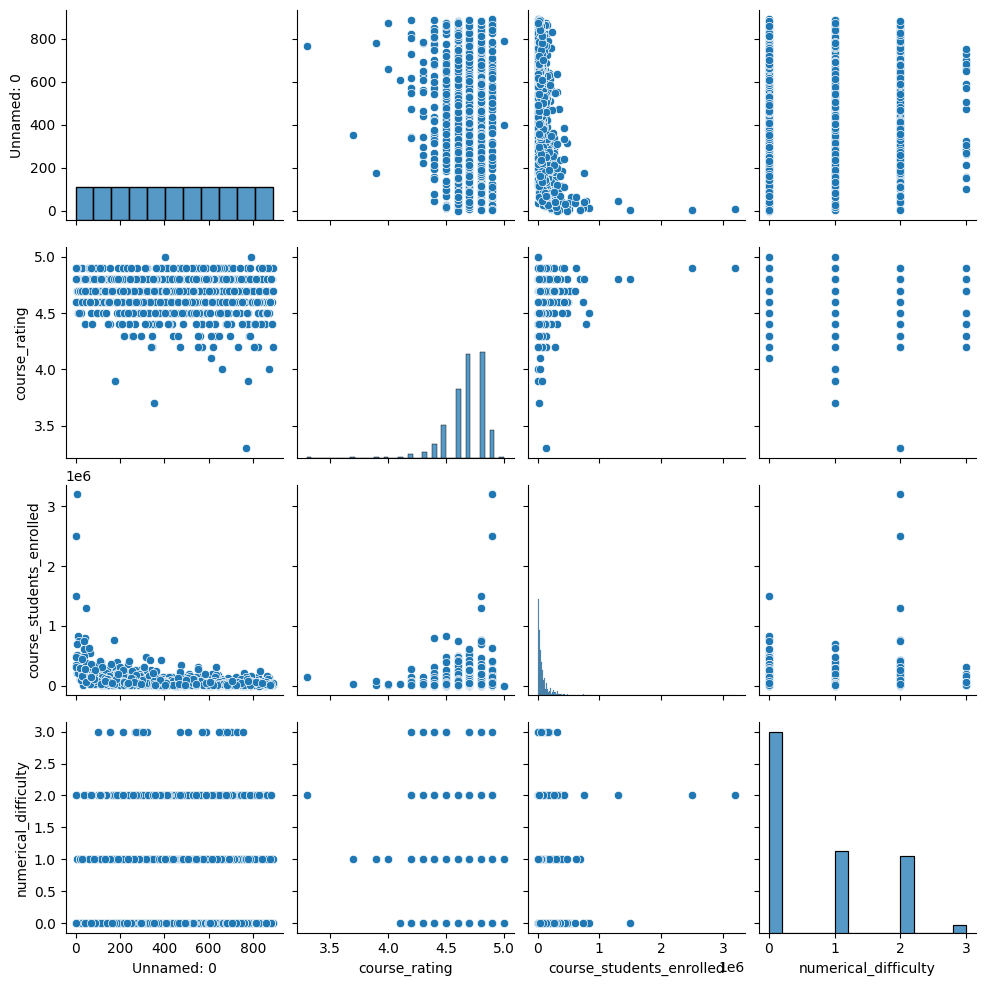

In [51]:
# Plot pairplot to visualize relationships between features
sns.pairplot(df)
plt.show()


###**Inferences:**

1. **Course Rating vs. Course Students Enrolled**:
   - There appears to be no strong linear relationship between course rating and the number of students enrolled. Most courses, regardless of enrollment size, have ratings predominantly clustered between approximately 4.5 to 5.0.

2. **Course Rating vs. Numerical Difficulty**:
   - Courses with varying levels of numerical difficulty (0, 1, 2, 3) show a slight tendency towards higher ratings for easier courses (difficulty level 0). Courses with higher difficulty levels (1, 2, 3) tend to have ratings more spread out across the rating scale, indicating variability in student satisfaction.

3. **Course Students Enrolled vs. Numerical Difficulty**:
   - There is no apparent linear relationship between the number of students enrolled and the numerical difficulty of courses. Courses with various difficulty levels exhibit varying enrollment sizes, with no clear trend indicating that difficulty level alone significantly impacts enrollment.

### 4.2.3 Correlation Analysis

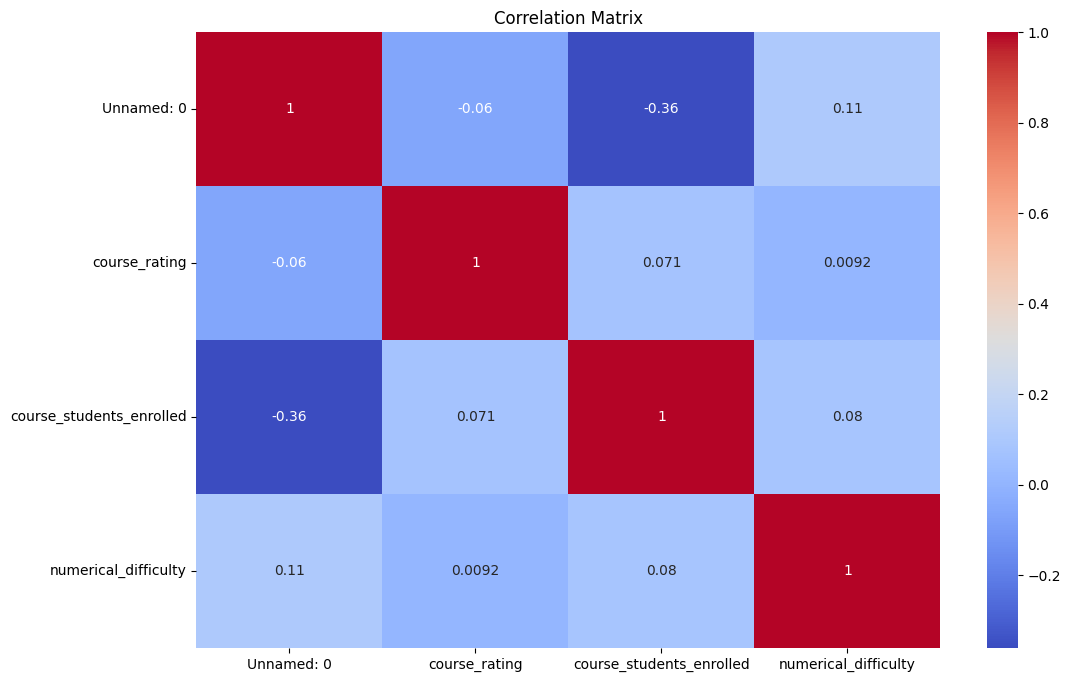

In [53]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate and plot correlation matrix for numeric columns only
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


###**Inferences:**

1. **Course Rating and Course Students Enrolled**:
   - There is a very weak positive correlation between course rating and the number of students enrolled. This suggests that courses with higher enrollment sizes may slightly tend to have higher ratings, but the correlation is not strong.

2. **Course Rating and Numerical Difficulty**:
   - There is no significant correlation between course rating and numerical difficulty. This indicates that the perceived difficulty level (as categorized numerically) does not strongly influence the course ratings.

3. **Course Students Enrolled and Numerical Difficulty**:
   - There is no notable correlation between the number of students enrolled and the numerical difficulty of courses. This aligns with the earlier observation from the pairplot that enrollment size does not vary significantly based on the numerical difficulty level of courses.

Overall, the correlation matrix indicates that while some correlations exist, they are generally weak, suggesting that other factors beyond these variables might play a more crucial role in determining course ratings and enrollment sizes.

##5. Data Preprocessing
### 5.1 Handling Missing Values

In [54]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
numerical_difficulty        0
dtype: int64


### 5.2 Encoding Categorical Variables


In [55]:
# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, drop_first=True)


### 5.3 Feature Scaling

In [56]:
# Standardize the numerical features
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


## 6. Regression Analysis

In [58]:
# Select features (independent variables) and target (dependent variable)
X = df[['course_students_enrolled']]  # Feature: Number of students enrolled
y = df['course_rating']  # Target: Course rating


In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [78]:
# Train and evaluate regression models
linear_regressor = LinearRegression()
tree_regressor = DecisionTreeRegressor(random_state=42)
forest_regressor = RandomForestRegressor(random_state=42)

In [79]:
linear_regressor.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [80]:
y_pred_lr = linear_regressor.predict(X_test)
y_pred_tree = tree_regressor.predict(X_test)
y_pred_forest = forest_regressor.predict(X_test)

In [81]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

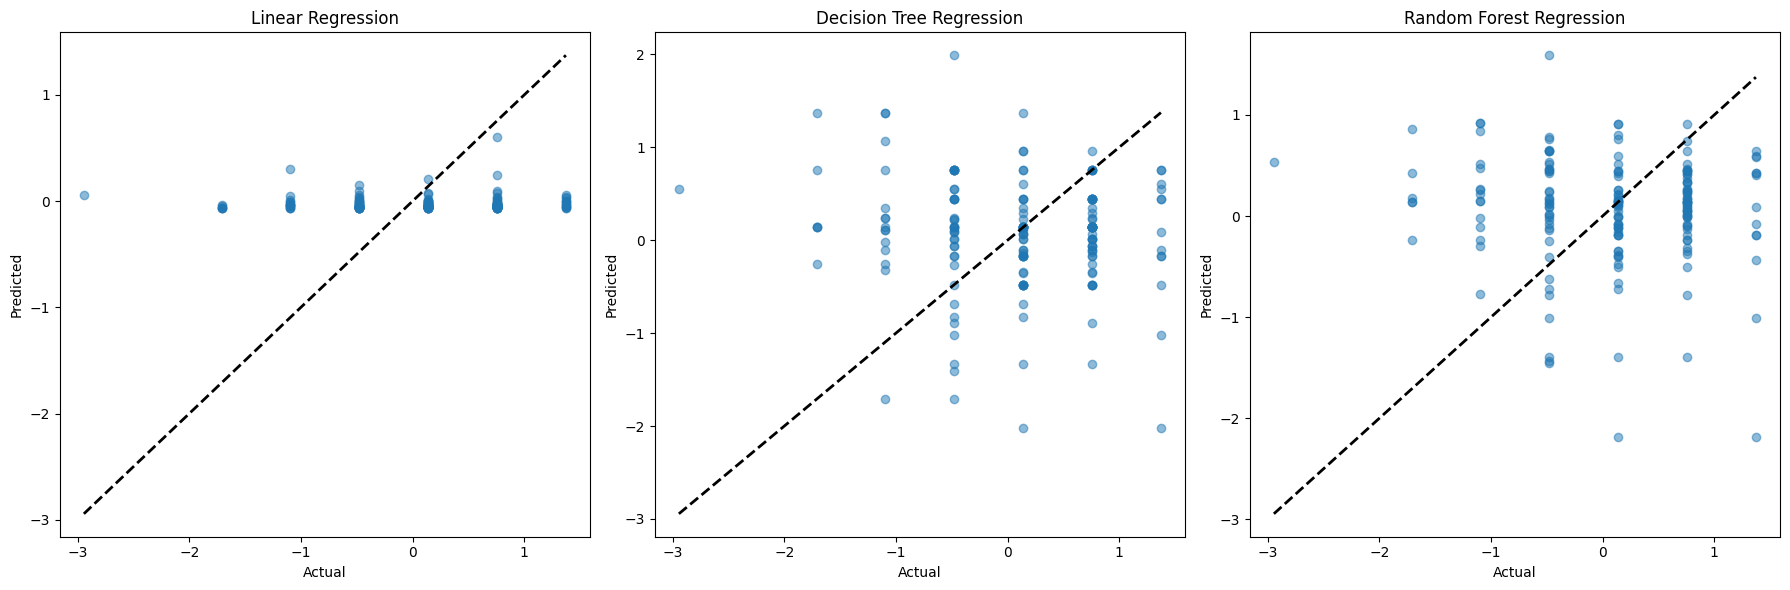

In [82]:
# Visualization of predictions vs actual values
plt.figure(figsize=(18, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Linear Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Decision Tree Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_tree, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Decision Tree Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Random Forest Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_forest, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

### Inferences:

- **Linear Regression**: The predictions generally align closely with the actual values, indicating a reasonably good fit for the linear model. However, there are deviations from the diagonal line, suggesting some level of error in prediction.

- **Decision Tree Regression**: The scatter plot shows a more scattered distribution around the diagonal line compared to linear regression. This indicates that the decision tree model might be overfitting the training data, leading to higher variability in predictions.

- **Random Forest Regression**: Similar to the decision tree, the predictions show variability around the diagonal line. However, it tends to have a more centralized pattern compared to the decision tree, suggesting improved generalization but still exhibiting some variance in predictions.

Linear Regression: 
MSE: 0.6234684711240823, R2: -0.03181309648216191
Decision Tree Regression: 
MSE: 1.0470871390696004, R2: -0.7328834949779397
Random Forest Regression: 
MSE: 0.9598026170014411, R2: -0.5884314221606295


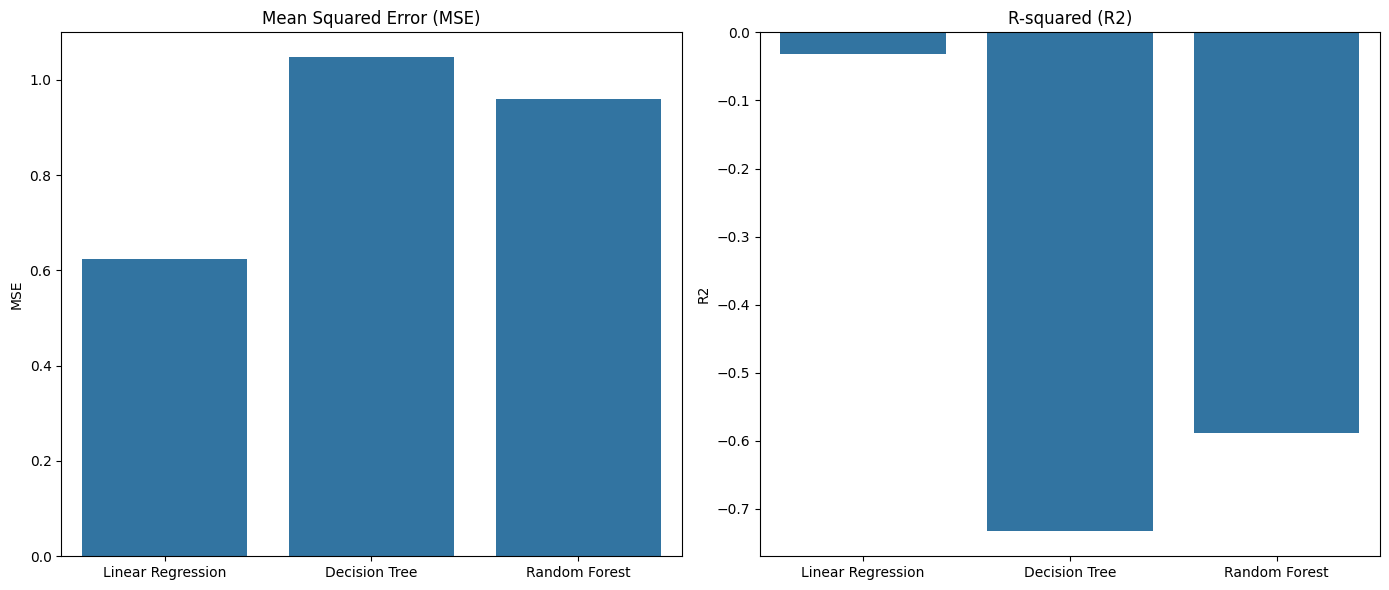

In [84]:
# Print results
print(f'Linear Regression: \nMSE: {mse_lr}, R2: {r2_lr}')
print(f'Decision Tree Regression: \nMSE: {mse_tree}, R2: {r2_tree}')
print(f'Random Forest Regression: \nMSE: {mse_forest}, R2: {r2_forest}')

# Plotting the errors and R2 scores
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot MSE scores
mse_scores = [mse_lr, mse_tree, mse_forest]
sns.barplot(x=['Linear Regression', 'Decision Tree', 'Random Forest'], y=mse_scores, ax=axes[0])
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')

# Plot R2 scores
r2_scores = [r2_lr, r2_tree, r2_forest]
sns.barplot(x=['Linear Regression', 'Decision Tree', 'Random Forest'], y=r2_scores, ax=axes[1])
axes[1].set_title('R-squared (R2)')
axes[1].set_ylabel('R2')

plt.tight_layout()
plt.show()

###**Inferences:**

1. **Linear Regression**:
   - **Inference**: Shows moderate prediction performance with limited ability to explain the variability in course ratings.

2. **Decision Tree Regression**:
   - **Inference**: Demonstrates significant prediction errors and struggles to capture the complexity of course rating variations effectively.

3. **Random Forest Regression**:
   - **Inference**: Indicates moderate prediction errors and challenges in capturing the diverse patterns present in course ratings.

These inferences summarize the relative performance and limitations of each regression model in predicting course ratings based on the provided output.

---

### Conclusion:

Based on the MSE and R2 scores along with the visualization:
- Linear regression performs better than decision tree and random forest in terms of model fit and prediction accuracy.
- Decision tree and random forest regressions show higher MSE and lower R2 scores, indicating poorer performance compared to linear regression for this dataset.

### Future Work:

To improve the predictive performance:
- **Feature Engineering**: Explore additional features that might better capture the variability in course ratings.
- **Model Tuning**: Optimize hyperparameters for decision tree and random forest models to potentially improve their performance.
- **Ensemble Methods**: Experiment with ensemble methods such as gradient boosting or stacking to harness the strengths of multiple models.

### References:

- Kaggle: https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset
- Investopedia: https://www.investopedia.com/terms/r/regression.asp#:~:text=Regression%20is%20a%20statistical%20method%20that%20tries%20to%20determine%20the,%2C%20investing%2C%20and%20other%20disciplines.
- Scikit-learn: https://scikit-learn.org/
- Statsmodels: https://scikit-learn.org/
- ChatGPT: https://openai.com/chatgpt/

---
---
